# **Library**

In [30]:
import warnings
warnings.filterwarnings("ignore")
# ====================================
# 1) - EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import math
# ====================================
# Data Preprocssing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , RobustScaler , MinMaxScaler , TargetEncoder , OrdinalEncoder,FunctionTransformer
from imblearn.combine import SMOTEENN , SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Split Data
from sklearn.model_selection import train_test_split
# ML Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
# Evalutaion Model
from sklearn.metrics import accuracy_score ,recall_score , precision_score , classification_report ,  f1_score
from sklearn.metrics import roc_curve ,roc_auc_score , confusion_matrix,ConfusionMatrixDisplay , auc

# **Data Preparation**

### **1) - Data Exploration**

In [4]:
data = pd.read_csv('/content/stroke_risk_dataset_v2.csv')
df = data.copy()
df.head()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1


In [5]:
# Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

In [6]:
# Shape Of Data
df.shape

(35000, 19)

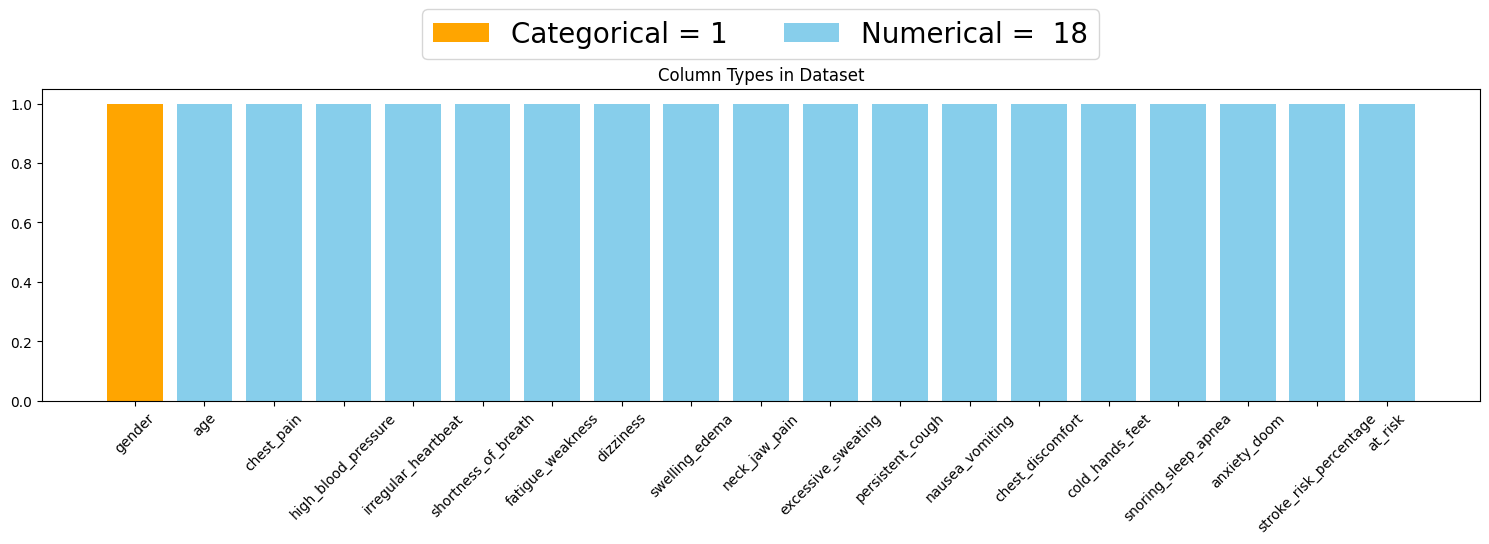

In [7]:
# Show Categorical & Numerical Columns
cat_cols = df.select_dtypes(include="O").columns.tolist()
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

types = ["Categorical"] * len(cat_cols) + ["Numerical"] * len(num_cols)
colors = ["orange" if t == "Categorical" else "skyblue" for t in types]
cols = cat_cols + num_cols

# =====================================
# Show Bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(cols, 1, color=colors)
plt.title("Column Types in Dataset")
plt.xticks(rotation=45)
# =====================================
# Show Box Legend
legend_elements = [
    Patch(facecolor='orange',  label=f'Categorical = {len(cat_cols)}'),
    Patch(facecolor='skyblue', label=f'Numerical =  {len(num_cols)}')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.3),
           ncol=2, fontsize=20, frameon=True)
plt.tight_layout()
plt.show()

In [8]:
for i in df.select_dtypes(include='object').columns:
    print(i , df[i].unique())

gender ['Male' 'Female']


# ===========================================
### **2) - Data clean**

In [9]:
# Check Null (Missing Values)
df.isna().sum()

,0
age,0
gender,0
chest_pain,0
high_blood_pressure,0
irregular_heartbeat,0
shortness_of_breath,0
fatigue_weakness,0
dizziness,0
swelling_edema,0
neck_jaw_pain,0


In [49]:
# Check Duplicated Values
print( f' Duplicated = {df.duplicated().sum()} \n====================================')
data[data.duplicated()].tail(50) # 16000 

 Duplicated = 0 


,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
34911,24,Male,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,14.0,0
34912,32,Female,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21.7,0
34916,38,Female,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,29.0,0
34917,43,Female,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,51.9,1
34919,27,Male,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15.3,0
34920,44,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.2,0
34921,33,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.3,0
34925,33,Male,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,59.4,1
34926,39,Male,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,46.4,0
34928,29,Male,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21.5,0


In [11]:
df = df.drop_duplicates()
print( f' Duplicated = {df.duplicated().sum()} \n====================================')
df[df.duplicated()]

 Duplicated = 0 


,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk


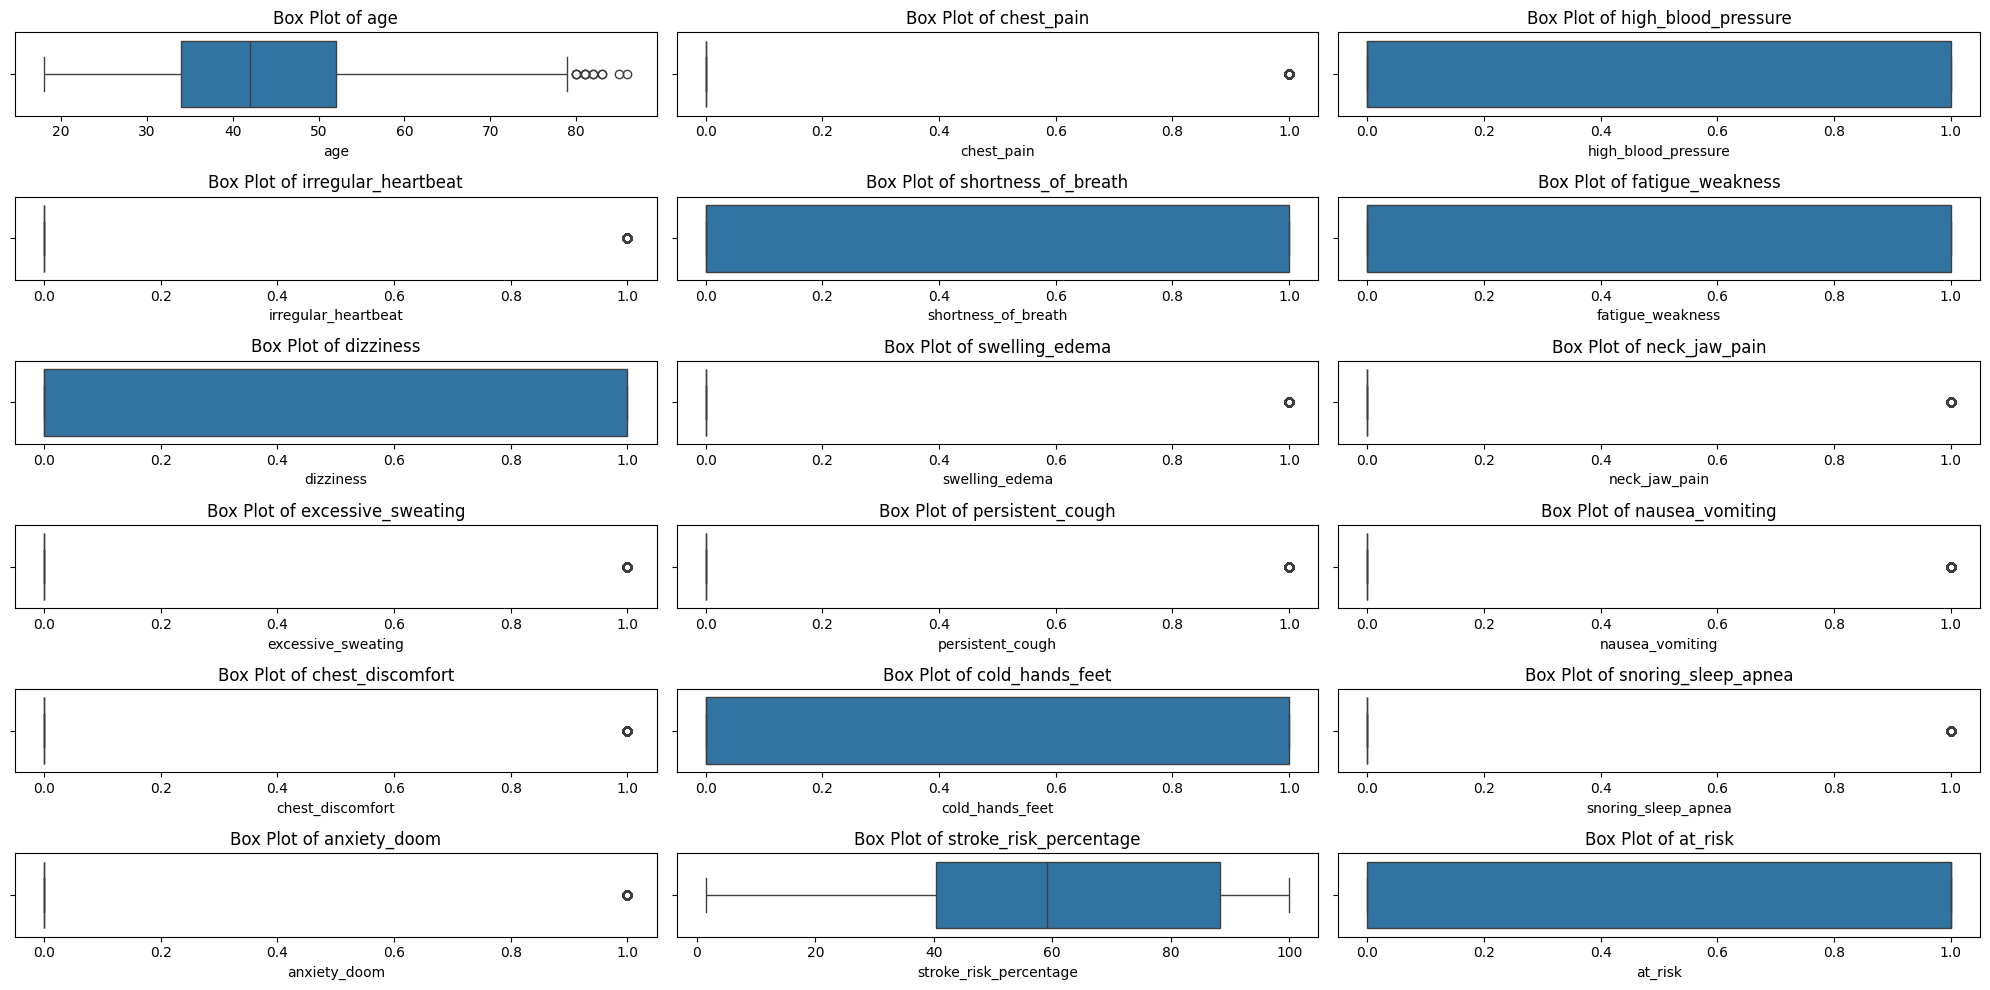

In [12]:
# Check Outlier
plt.figure(figsize=(20, 10))
for i, feature in enumerate(num_cols):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# ===========================================
### **4) - EDA**


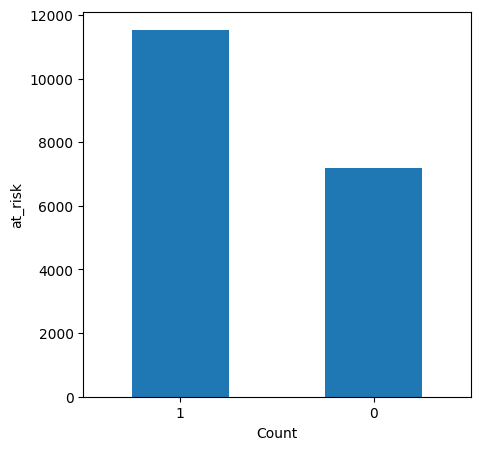

In [13]:
## Target values
df['at_risk'].value_counts().plot(kind='bar', figsize=(5, 5))
plt.xlabel('Count')
plt.ylabel('at_risk');
plt.xticks(rotation=0);
# Corr , Skew ,  Select K , DT   [ tensorflow ==> Keras]

<Figure size 1000x600 with 0 Axes>

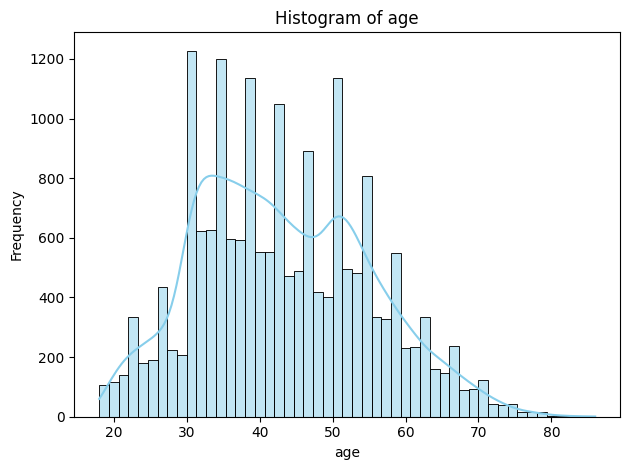

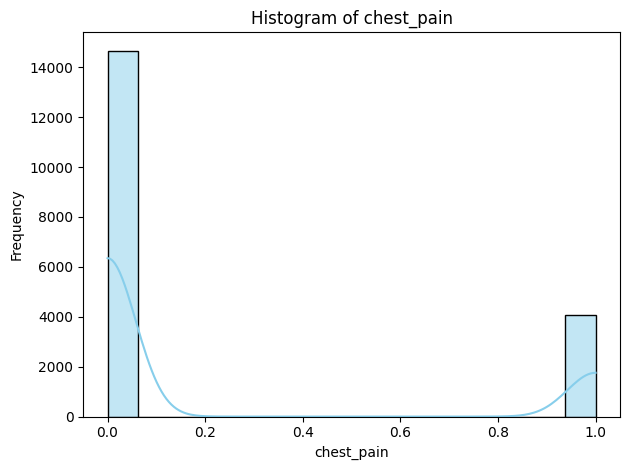

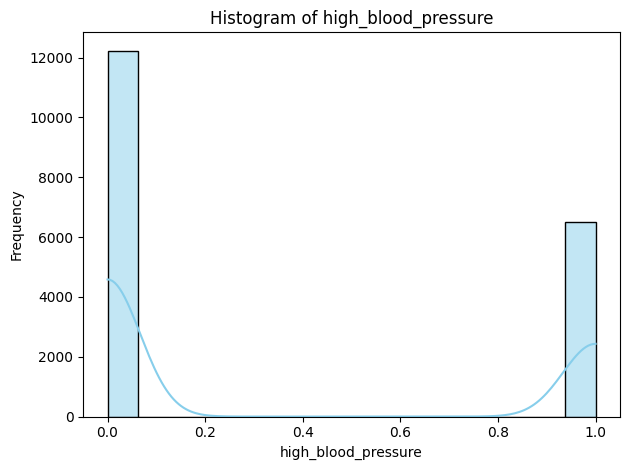

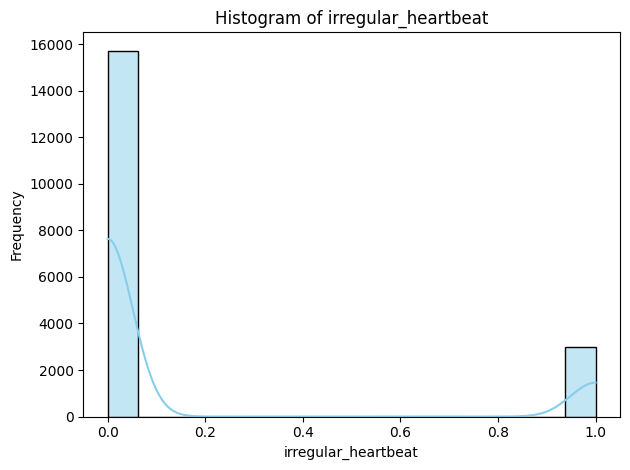

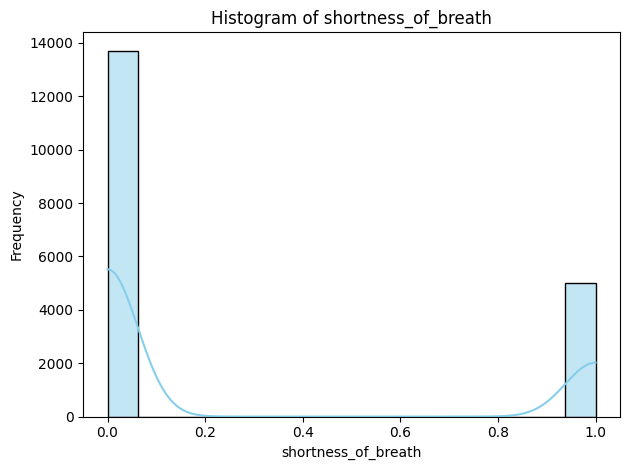

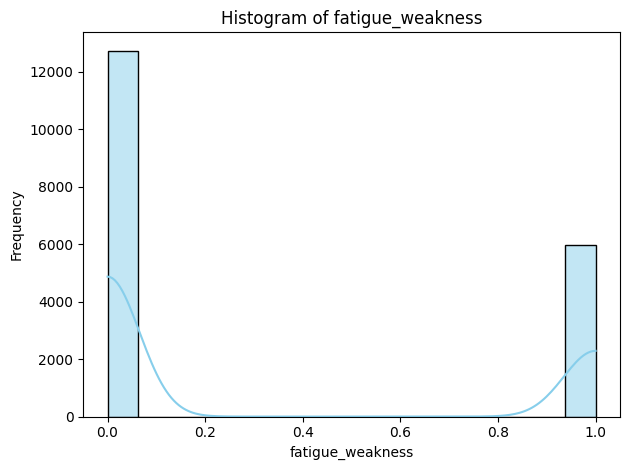

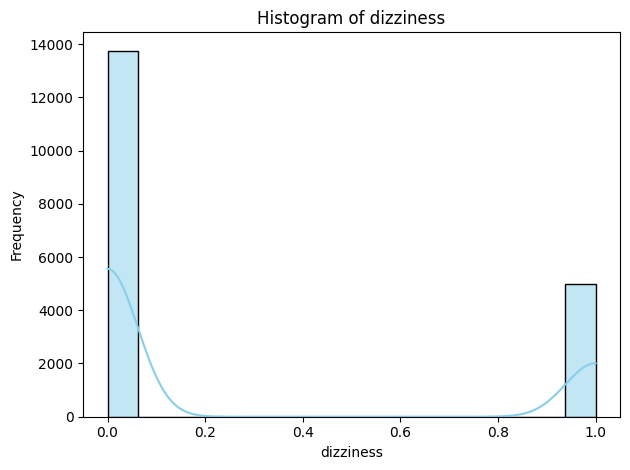

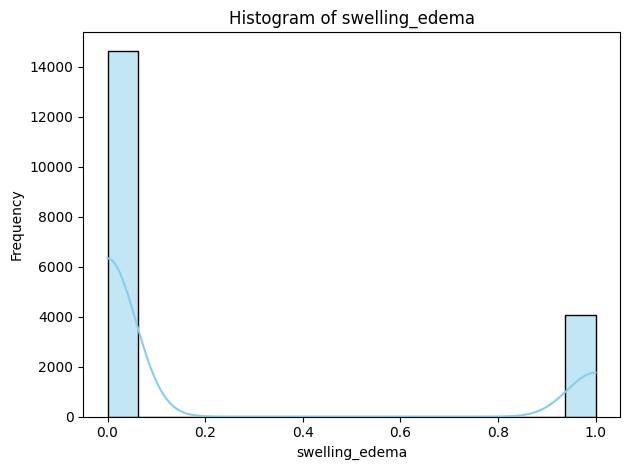

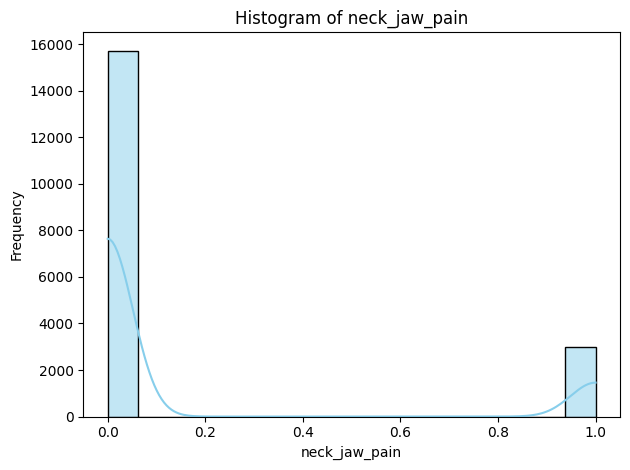

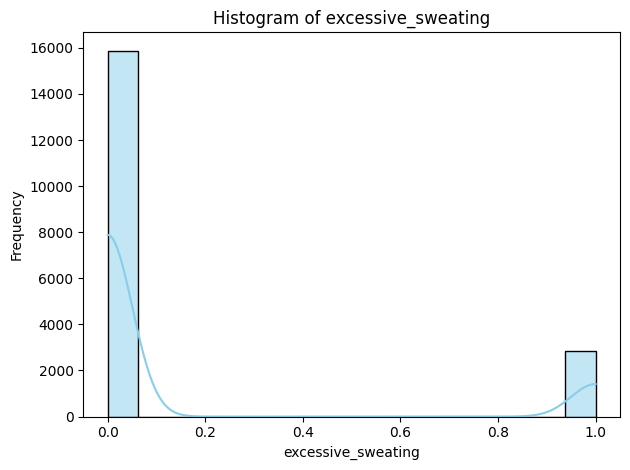

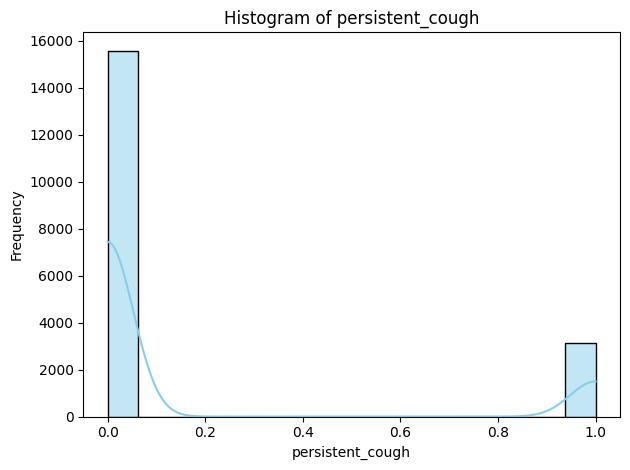

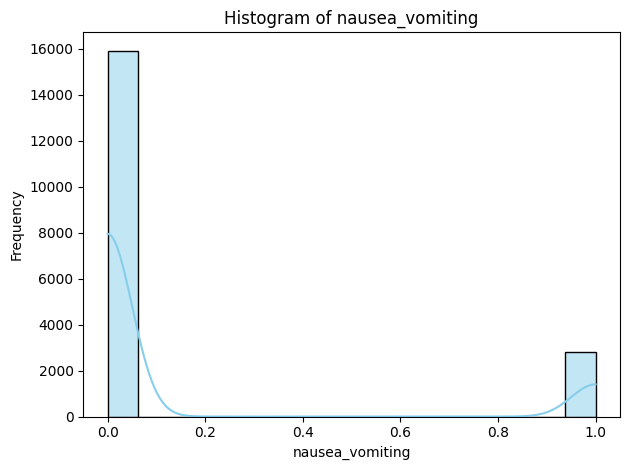

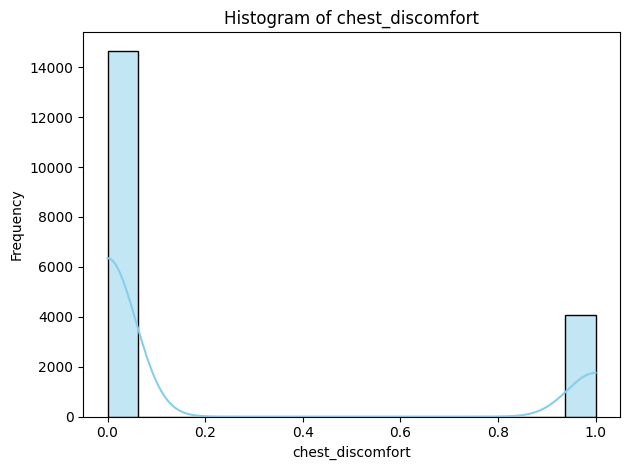

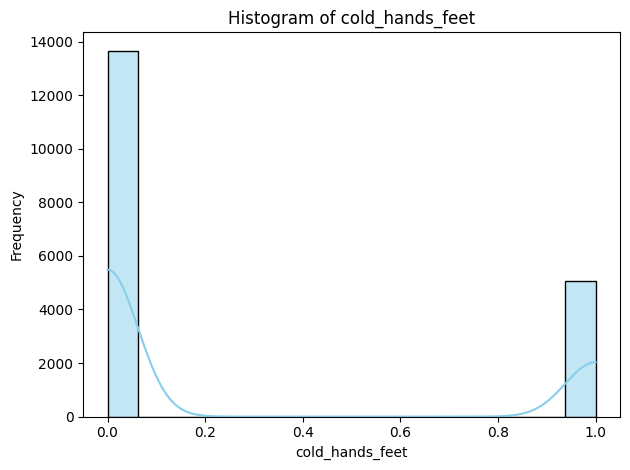

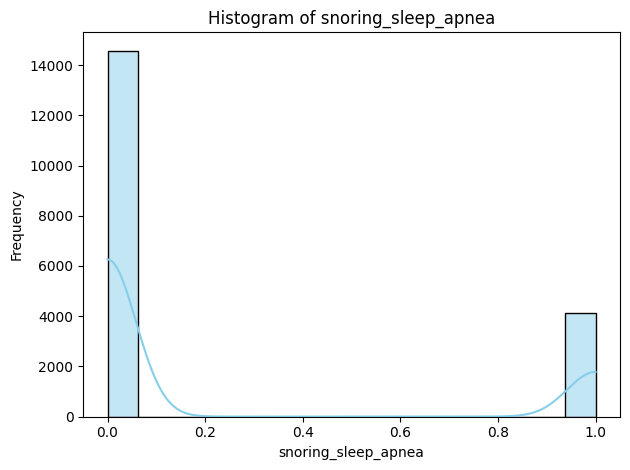

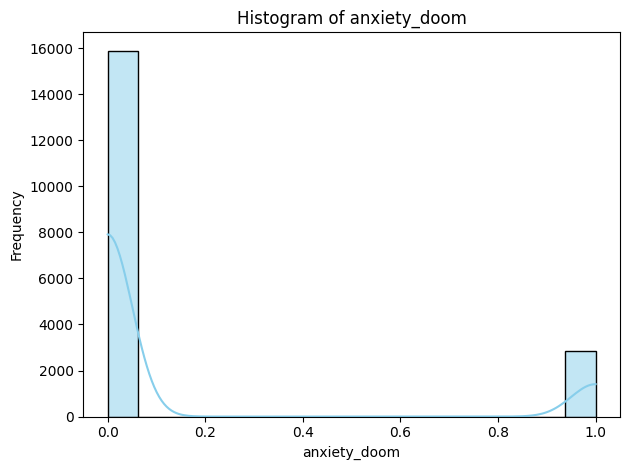

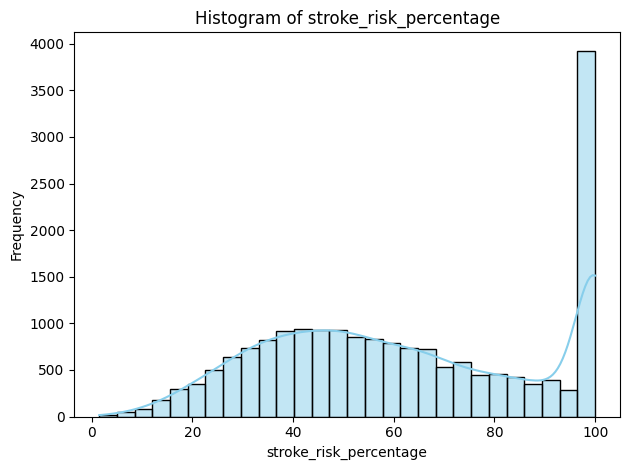

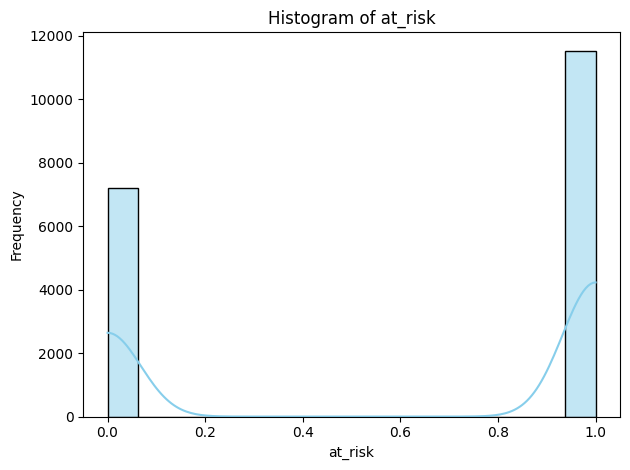

In [14]:
# Set the plot aesthetics
plt.figure(figsize=(10,6))

# 1. Histogram for numeric features
numeric_df = df.select_dtypes(include=[np.number])
numeric_cols = numeric_df.columns.tolist()

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure()
    sns.histplot(numeric_df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


<Axes: >

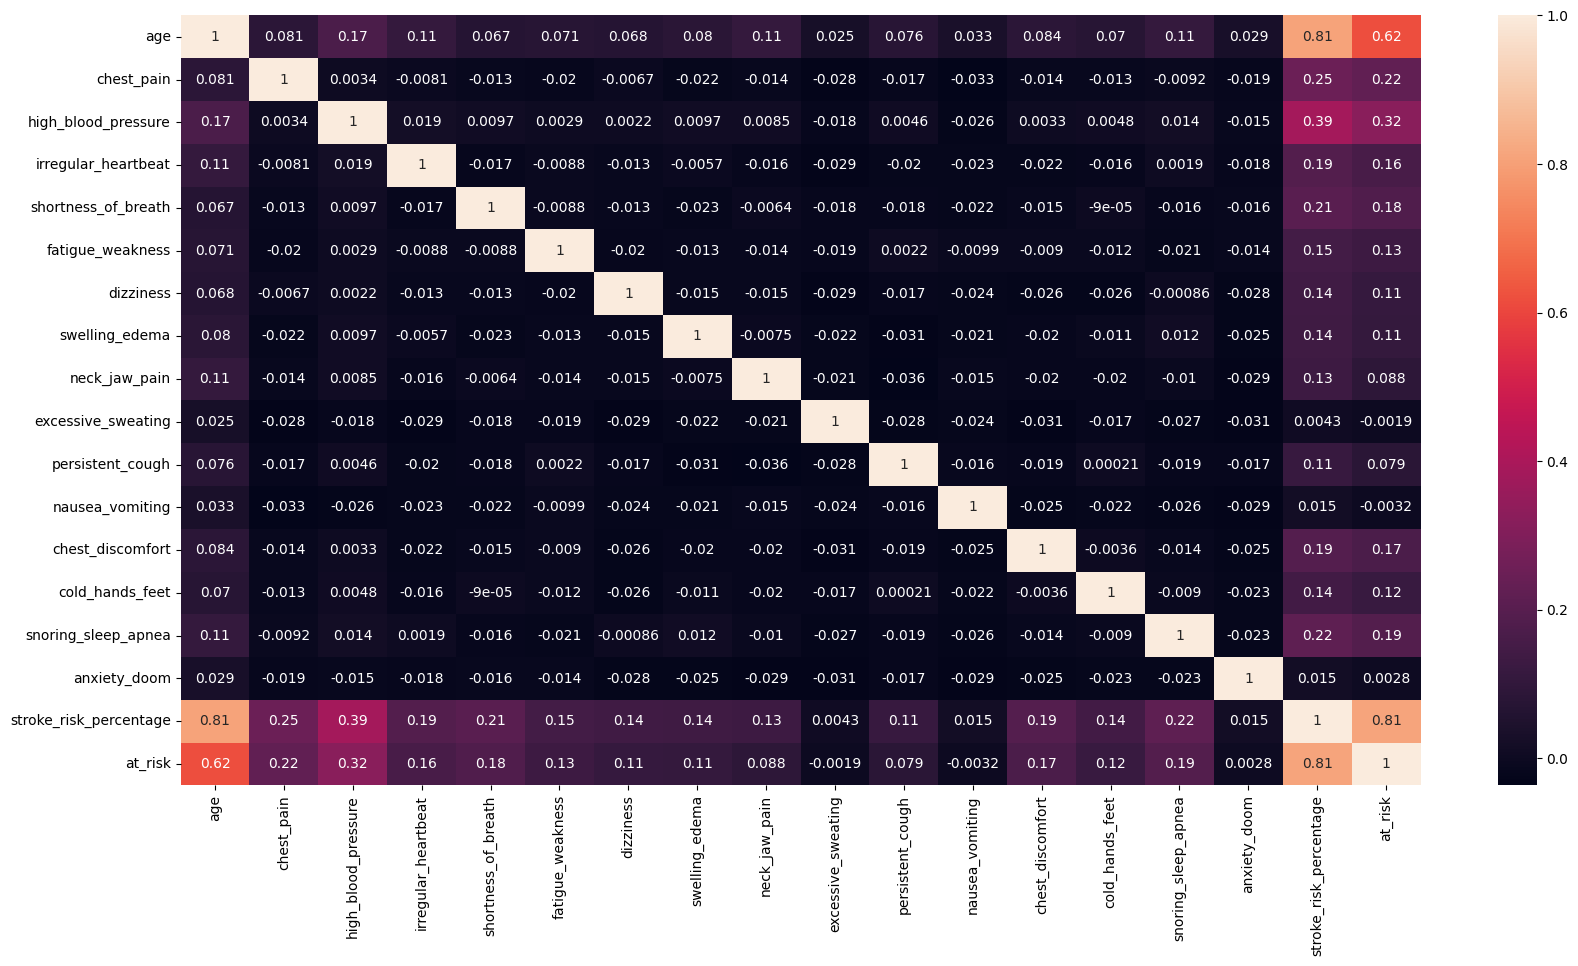

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: >

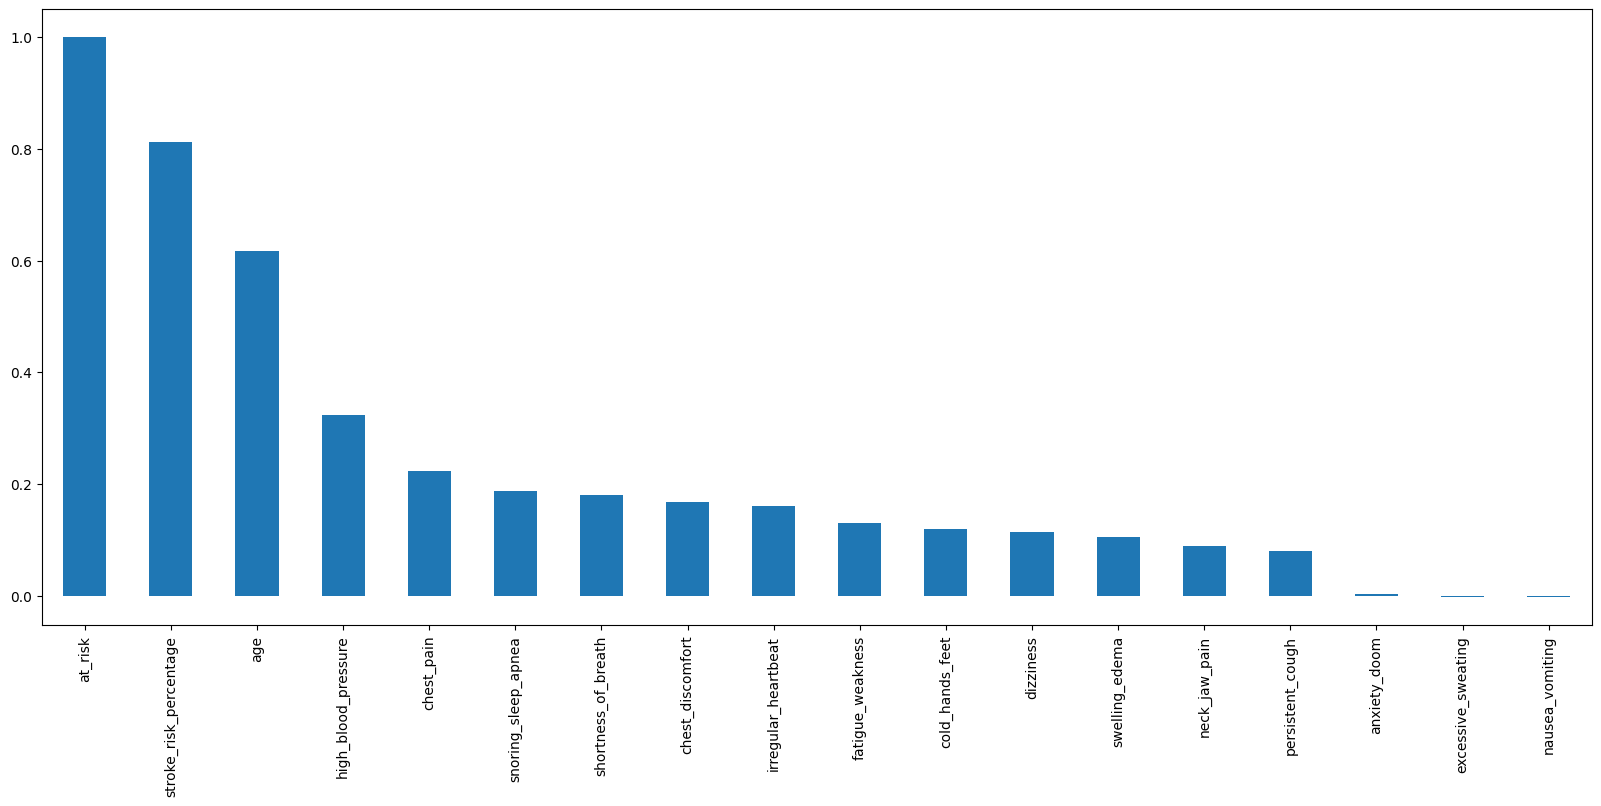

In [16]:
# Correlation
plt.figure(figsize=(20,8))
df.corr(numeric_only=True)['at_risk'].sort_values(ascending = False).plot(kind='bar')

# =======================================
# ML Models


In [22]:
# Drop target Value
X = df.drop(columns=['at_risk', 'stroke_risk_percentage'])
y = df['at_risk']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
   
# ML 
# Preprocessing 
# Model []

In [23]:
# Preprocessing 1 
# ==========================
categorical = ['gender']
numeric = X.drop(columns=categorical).columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical),
    ('num', StandardScaler(), numeric)
])


In [24]:
# Models 2 
# ==========================
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000),
                           {"model__C": [0.01, 0.1, 1, 10]}),

    "SVM": (SVC(probability=True),
            {"model__C": [0.1, 1, 10],
             "model__kernel": ["linear", "rbf"]}),

    "DecisionTree": (DecisionTreeClassifier(),
                     {"model__max_depth": [3, 5, 10, None],
                      "model__min_samples_split": [2, 5, 10]}),

    "RandomForest": (RandomForestClassifier(),
                     {"model__n_estimators": [100, 200],
                      "model__max_depth": [None, 5, 10]}),

    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric="logloss"), 
                {"model__n_estimators": [100, 200],
                 "model__max_depth": [3, 5, 7],
                 "model__learning_rate": [0.01, 0.1, 0.2]})
}

In [25]:
# Cross Validation + GridSearch [3]
# ========================== [ acc = train + test ]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
best_models = {}

for name, (clf, params) in models.items():
    pipe = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', clf)
    ])

    grid = GridSearchCV(pipe, params, cv=cv, scoring='accuracy', n_jobs=-1,
                        return_train_score=True)
    grid.fit(X_train, y_train)

    # Train/Validation scores  split
    mean_train = np.mean(grid.cv_results_['mean_train_score'])
    mean_val = np.mean(grid.cv_results_['mean_test_score'])

    results[name] = {
        "best_score": grid.best_score_,
        "best_params": grid.best_params_,
        "train_score": mean_train,
        "val_score": mean_val
    }
    best_models[name] = grid.best_estimator_


In [26]:
# What is Evaluation Matrix ? [ F1 score , recall , precision  , CM ] &&&& Why ?? 
for model, res in results.items():
    print(f"{model}:")
    print(f"  Train CV Score (avg): {res['train_score']:.4f}")
    print(f"  Validation CV Score (avg): {res['val_score']:.4f}")
    print(f"  Best Validation Score: {res['best_score']:.4f}")
    print(f"  Best Params: {res['best_params']}")
    print("-"*40)

LogisticRegression:
  Train CV Score (avg): 0.9724
  Validation CV Score (avg): 0.9720
  Best Validation Score: 0.9728
  Best Params: {'model__C': 10}
----------------------------------------
SVM:
  Train CV Score (avg): 0.9807
  Validation CV Score (avg): 0.9756
  Best Validation Score: 0.9823
  Best Params: {'model__C': 10, 'model__kernel': 'rbf'}
----------------------------------------
DecisionTree:
  Train CV Score (avg): 0.8909
  Validation CV Score (avg): 0.8643
  Best Validation Score: 0.9110
  Best Params: {'model__max_depth': None, 'model__min_samples_split': 5}
----------------------------------------
RandomForest:
  Train CV Score (avg): 0.9430
  Validation CV Score (avg): 0.9148
  Best Validation Score: 0.9393
  Best Params: {'model__max_depth': None, 'model__n_estimators': 200}
----------------------------------------
XGBoost:
  Train CV Score (avg): 0.9502
  Validation CV Score (avg): 0.9330
  Best Validation Score: 0.9772
  Best Params: {'model__learning_rate': 0.2, 'mo

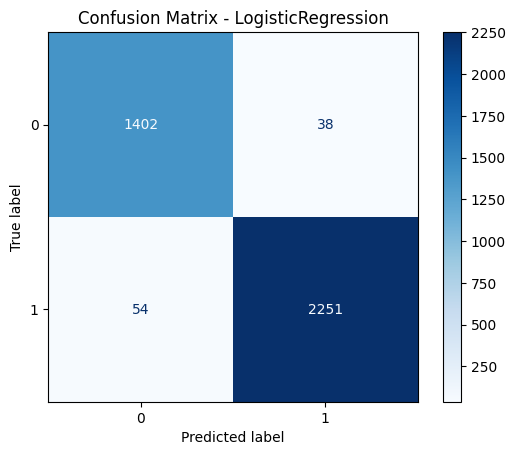

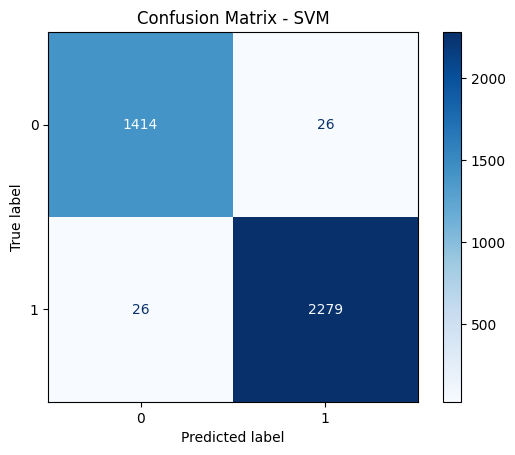

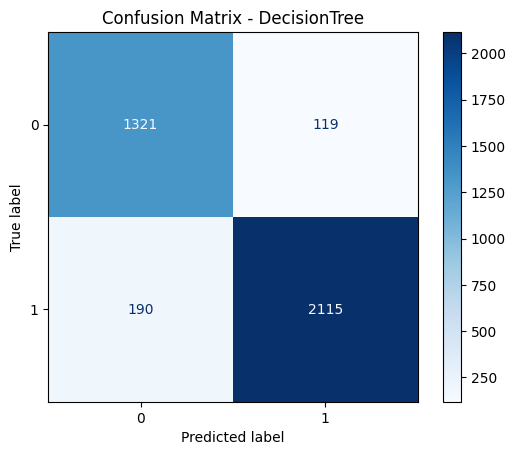

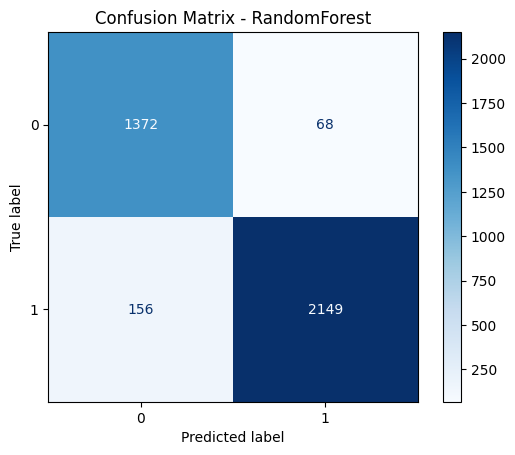

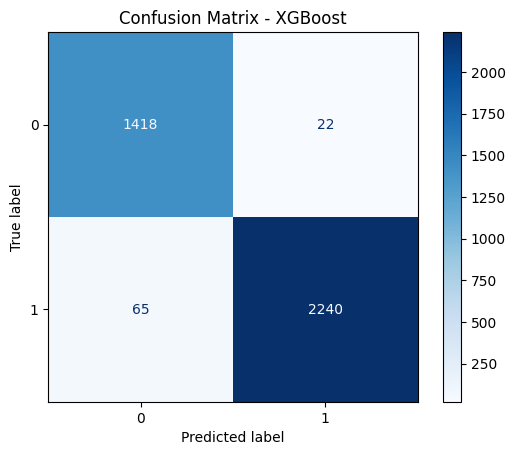

In [27]:
# # Confusion Matrix 
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

==================== LogisticRegression ====================
              precision    recall  f1-score   support

           0     0.9629    0.9736    0.9682      1440
           1     0.9834    0.9766    0.9800      2305

    accuracy                         0.9754      3745
   macro avg     0.9732    0.9751    0.9741      3745
weighted avg     0.9755    0.9754    0.9755      3745

ROC-AUC: 0.9978

==================== SVM ====================
              precision    recall  f1-score   support

           0     0.9819    0.9819    0.9819      1440
           1     0.9887    0.9887    0.9887      2305

    accuracy                         0.9861      3745
   macro avg     0.9853    0.9853    0.9853      3745
weighted avg     0.9861    0.9861    0.9861      3745

ROC-AUC: 0.9993

==================== DecisionTree ====================
              precision    recall  f1-score   support

           0     0.8743    0.9174    0.8953      1440
           1     0.9467    0.9176    0.93

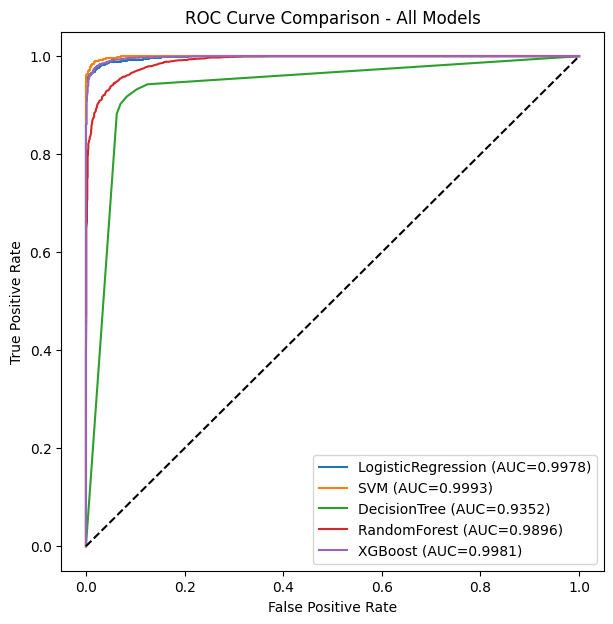

In [29]:
# ==========================
# Evaluate all best models
# ==========================
for name, model in best_models.items():
    print("="*20, name, "="*20)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    # Classification Report
    print(classification_report(y_test, y_pred, digits=4))

    # ROC-AUC
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC: {auc_score:.4f}\n")

# ==========================
# Plot ROC Curves comparison
# ==========================
plt.figure(figsize=(7,7))

for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.4f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - All Models")
plt.legend()
plt.show()

# ==========================
# Save and Load Model

In [34]:
import joblib

joblib.dump(best_models["SVM"], "strok_svm.pkl")

['strok_svm.pkl']

In [39]:
loaded_model = joblib.load("strok_svm.pkl")

UnpicklingError: STACK_GLOBAL requires str

In [38]:
new_data = pd.DataFrame([{
    "age": 22,
    "gender": "Male",
    "chest_pain": 1,
    "high_blood_pressure": 0,
    "irregular_heartbeat": 0,
    "shortness_of_breath": 0,
    "fatigue_weakness": 0,
    "dizziness": 0,
    "swelling_edema": 0,
    "neck_jaw_pain": 0,
    "excessive_sweating": 0,
    "persistent_cough": 1,
    "nausea_vomiting": 0,
    "chest_discomfort": 0,
    "cold_hands_feet": 0,
    "snoring_sleep_apnea": 0,
    "anxiety_doom": 0
}])

pred = model.predict(new_data)
proba = model.predict_proba(new_data)[:, 1]

print("Prediction:", pred[0])
print("Risk Probability:", proba[0])

Prediction: 0
Risk Probability: 0.010167128


In [42]:
import sklearn
sklearn_version = sklearn.__version__
print(f"scikit-learn version: {sklearn_version}")

scikit-learn version: 1.6.1
